# Percolación Ejercicio 1
***
## Grupo:
1. Adrián Bedón
1. Merlo José Miguel
1. Moreta Andrés
1. Ocaña Dennis
1. Ramos Xavier
***

## Qué es la percolación?
Percolación hace referencia al paso de fluidos a través de materiales porosos. Un ejemplo de percolación es la filtración<br>

<div>
<img src="https://cdn0.ecologiaverde.com/es/posts/3/2/1/como_hacer_un_filtro_de_agua_casero_para_beber_1123_orig.jpg" width="500"/>
</div>

***

## Simulación de Montecarlo para estudiar un fenómeno natural conocido como percolación

Para el propósito de estas simulaciones se definirá un sistema de `n * n` a modo de cuaadrícula. Dentro de esta cada cuadrante puede estar bloqueado o disponible y los cuadrantes disponibles son inicializados _vacíos_. Un sitio _lleno_ es un sitio disponible que se conecta a un sitio aledaño que también está _diponible_ siendo estos: arriba, abajo, izquierda y/o derecha).<br>
<br>
El sistema se dirá que percola si es que hay un sitio disponible _completo_ esto significando que esta conectado de un extremo a otro de la cuadrícula.<br>
<br>
<div>
<img src="https://introcs.cs.princeton.edu/python/24percolation/images/percolates-yes.png" width="300"/>
<img src="https://introcs.cs.princeton.edu/python/24percolation/images/percolates-no.png" width="300"/>
    
</div>

***

## Percolación vertical
Dada una matriz que representa los sitios disponibles, debemos determinar si este sistema percola. Empezando com percolación vertical siendo este el más simple ya que solo buscará percolación directamente en el plano vertical
<br>
<br>
<div>
<img src="https://introcs.cs.princeton.edu/python/24percolation/images/percolates-vertically-yes.png" width="300"/>
<img src="https://introcs.cs.princeton.edu/python/24percolation/images/percolates-vertically-no.png" width="300"/>
</div>

***

In [1]:
## Importamos librerias necesarias
#import numpy as np
import numpy as np #importamos numpy para utilizar linspace
import numba as nb #se importa numba para aceleracion por GPU en diversas funciones
from numba import cuda #para aceleracion por GPU en diversas funciones
from numba import jit #para aceleracion por GPU en diversas funciones
from numba import njit #para aceleracion por GPU en diversas funciones

In [2]:
## Arma un array segun las probabilidades que se indique para las celdas disponibles
@jit
def armarArray(n, probabilidadDisponible):
    array = np.random.binomial(1, probabilidadDisponible, size=(n,n))
    return array

In [3]:
@jit
def flowVertical(array):
    n = len(array)
    ArrayCamino = np.zeros((n,n),dtype=int)
    for j in range(n):
        _flowVertical(array, ArrayCamino, 0, j)
    return ArrayCamino

In [4]:
## Arma un funcion recursiva para armar un array aparte que solo tendra los registros de las
## celdas disponibles que esten conectadas entre si
@jit
def _flowVertical(isOpen, isFull, i, j):
    n = len(isFull)
    if (i < 0) or (i >= n):
        return
    if (j < 0) or (j >= n):
        return
    if (isOpen[i][j] == 0):
        return
    if (isFull[i][j] == 1):
        return
    isFull[i][j] = 1
    _flowVertical(isOpen, isFull, i+1, j)  ## Abajo

In [5]:
## Ejecuta los segmentos recursivos del codigo y detecta si hay un 1 en la fila final
## ya que al haberlo, significa que si percola
@jit
def percolaVertical(isOpen):
    
    ## crea la matriz de 1 que estan juntos
    isFull = flowVertical(isOpen)
    
    
    ## verifica si hay algun 1 en la fila final ya que si es asi, el sistema si percola
    n = len(isFull)
    for j in range(n):
        if (isFull[n-1][j]):
            return True
    return False


In [29]:
## definimos una funcion que tomara n siendo esta la dimension de la matriz
## y p siendo la probabilidad de que la celda este disponible
## esta version incluye un print por propositos de demostración

def mainVerticalPrint(n,p):
    array = armarArray(n,p)
    print(array)
    print(percolaVertical(array))

## Ejemplo con un 2x2
mainVerticalPrint(2,0.5)

## Ejemplo con un 3x3
mainVerticalPrint(3,0.5)

## Ejemplo con un 4x4
mainVerticalPrint(4,0.5)

[[0 1]
 [0 0]]
False
[[0 0 1]
 [0 1 1]
 [1 0 1]]
True
[[0 0 1 0]
 [1 1 0 0]
 [1 0 0 0]
 [0 0 0 1]]
False


***

### Ejemplos para percolación vertical con 𝑝∈{0.1,0.5,0.9}. 

In [7]:
## definimos una funcion que tomara n siendo esta la dimension de la matriz
## y p siendo la probabilidad de que la celda este disponible

def mainVertical(n,p):
    array = armarArray(n,p)
    return percolaVertical(array)

In [8]:
## para 0.1
j=10000000
contador=0
p=0.1
n=2
for i in range (j):
    if mainVertical(n,p):
        contador=contador+1
        
PAnalitica1=(p**n*(n-p**n))
PExperim1=(contador/j)
e1=(((PExperim1)-PAnalitica1)/(PAnalitica1))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim1)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica1)
print("Para este ejemplo existió un error de:" , e1)

Percoló 197861 veces
Esto resulta en una probabilidad de 0.0197861
Comparado con la probabilidad por fórmula la cual es 0.019900000000000004
Para este ejemplo existió un error de: -0.00572361809045244


In [9]:
## para 0.5

j=10000000
contador=0
p=0.5
n=2
for i in range (j):
    if mainVertical(n,p):
        contador=contador+1
        
PAnalitica2=(p**n*(n-p**n))
PExperim2=(contador/j)
e5=(((PExperim2)-PAnalitica2)/(PAnalitica2))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim2)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica2)
print("Para este ejemplo existió un error de:" , e5)

Percoló 4375106 veces
Esto resulta en una probabilidad de 0.4375106
Comparado con la probabilidad por fórmula la cual es 0.4375
Para este ejemplo existió un error de: 2.4228571428633723e-05


In [10]:
## para 0.9

j=10000000
contador=0
p=0.9
n=2
for i in range (j):
    if mainVertical(n,p):
        contador=contador+1
        
PAnalitica3=(p**n*(n-p**n))
PExperim3=(contador/j)
e9=(((PExperim3)-PAnalitica3)/(PAnalitica3))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim3)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica3)
print("Para este ejemplo existió un error de:" , e9)

Percoló 9639464 veces
Esto resulta en una probabilidad de 0.9639464
Comparado con la probabilidad por fórmula la cual es 0.9639
Para este ejemplo existió un error de: 4.813777362797178e-05


Viendo la similitud de los valores, se puede decir que la fórmula de probabilidad de percolación es correcta para el sistema de 2x2. Si bien difieren los resultados experimentales de los resultados analíticos, estos son los suficientemente cercanos con un error promedio entre las 3 ejecuciones de:

-0.0018837505817986112


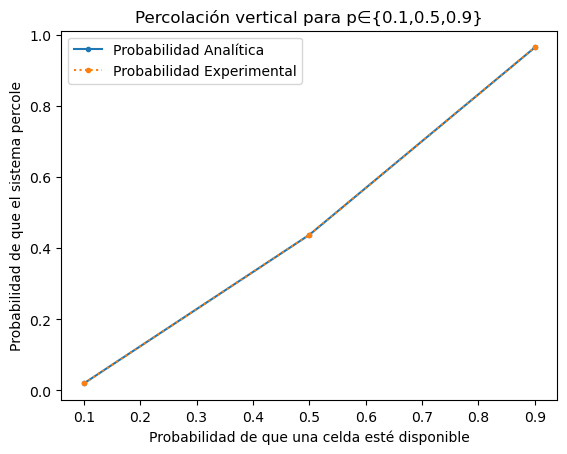

In [11]:
ErrorP=(e1+e5+e9)
print((ErrorP/3))
## pA siendo la probabilidad Analitica y pE la probabilidad calculada por simulación
import matplotlib.pyplot as plt
pA=[PAnalitica1,PAnalitica2,PAnalitica3]
pE=[PExperim1,PExperim2,PExperim3]
p=[0.1,0.5,0.9]
plt.plot(p,pA,'.',linestyle='solid',label='Probabilidad Analítica')
plt.plot(p,pE,'.',linestyle='dotted',label='Probabilidad Experimental')
plt.title("Percolación vertical para p∈{0.1,0.5,0.9}")
plt.xlabel("Probabilidad de que una celda esté disponible")
plt.ylabel("Probabilidad de que el sistema percole")
plt.legend()

plt.show()

Y con esto se puede concluir que la formula _(p**2*(2-p**2))_ funciona para el cálculo de la probabilidad de percolación vertical para una cuadricula de 2x2

***

## Percolación regular

Dada una matriz que representa los sitios disponibles, debemos determinar si este sistema percola. En los siguientes ejemplos se considera izquierda y derecha para el fluir de la percolación a pesar de que en una matriz de 2x2 solo existe la percolación de manera vertical.

<img src="https://introcs.cs.princeton.edu/python/24percolation/images/Perc20.png" width="500"/>


In [12]:
## Arma un funcion recursiva para armar un array aparte que solo tendra los registros de las
## celdas disponibles que esten conectadas entre si
@jit
def _flow(isOpen, isFull, i, j):
    n = len(isFull)
    if (i < 0) or (i >= n):
        return
    if (j < 0) or (j >= n):
        return
    if (isOpen[i][j] == 0):
        return
    if (isFull[i][j] == 1):
        return
    isFull[i][j] = 1
    _flow(isOpen, isFull, i+1, j  )  ## Abajo
    _flow(isOpen, isFull, i  , j+1)  ## Derecha
    _flow(isOpen, isFull, i  , j-1)  ## Izquierda
    _flow(isOpen, isFull, i-1, j  )  ## Arriba

In [13]:
## Crea un array nuevo en el cual se guardaran las celdas disponibles que esten conectadas
## a las demas y las detecta
@jit
def flow(isOpen):
    n = len(isOpen)
    isFull = np.zeros((n,n),dtype=int)
    for j in range(n):
        _flow(isOpen, isFull, 0, j)
    return isFull

In [14]:
## Ejecuta los segmentos recursivos del codigo y detecta si hay un 1 en la fila final
## ya que al haberlo, significa que si percola
@jit
def percola(isOpen):
    
    ## crea la matriz de 1 que estan juntos
    isFull = flow(isOpen)
    
    
    ## verifica si hay algun 1 en la fila final ya que si es asi, el sistema si percola
    n = len(isFull)
    for j in range(n):
        if (isFull[n-1][j]):
            return True
    return False


In [15]:
## Arma un funcion recursiva para armar un array aparte que solo tendra los registros de las
## celdas disponibles que esten conectadas entre si
@jit
def _flow(isOpen, isFull, i, j):
    n = len(isFull)
    if (i < 0) or (i >= n):
        return
    if (j < 0) or (j >= n):
        return
    if (isOpen[i][j] == 0):
        return
    if (isFull[i][j] == 1):
        return
    isFull[i][j] = 1
    _flow(isOpen, isFull, i+1, j  )  ## Abajo
    _flow(isOpen, isFull, i  , j+1)  ## Derecha
    _flow(isOpen, isFull, i  , j-1)  ## Izquierda
    _flow(isOpen, isFull, i-1, j  )  ## Arriba

In [16]:
## definimos una funcion que tomara n siendo esta la dimension de la matriz
## y p siendo la probabilidad de que la celda este disponible
## esta version incluye un print por propositos de demostración
def mainP(n, probabilidadDisponible):
    array = armarArray(n, probabilidadDisponible)
    print(array)
    print(percola(array))

In [30]:
## Ejecuta el metodo main que toma las dimensiones n*n de la matriz 
## y un numero float entre 0 y 1 el cual representara la 
## probabilidad de asumir 1 o disponible
## Ejemplo con un 2x2
mainP(2, 0.5)
## Ejemplo con un 3x3
mainP(3, 0.5)
## Ejemplo con un 4x4
mainP(4, 0.5)

[[0 0]
 [0 1]]
False
[[1 0 1]
 [0 0 0]
 [0 1 1]]
False
[[1 1 1 0]
 [1 0 0 0]
 [0 1 1 0]
 [0 0 1 0]]
False


### Pruebas para percolacion regular con 𝑝∈{0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9}. 

Se realiza pruebas con un segundo algoritmo que es capaz de detectar percolacion horizontal y vertical, a pesar de que en un sistema de percolación de 2x2 solo existe percolación de tipo vertical

In [18]:
## definimos una funcion que tomara n siendo esta la dimension de la matriz
## y p siendo la probabilidad de que la celda este disponible
def main(n, probabilidadDisponible):
    array = armarArray(n, probabilidadDisponible)
    return (percola(array))

In [19]:
## para 0.1 y un sistema 2x2 
j=10000000
contador=0
p=0.1
n=2
for i in range (j):
    if main(n,p):
        contador=contador+1
        
PAnalitica1=(p**n*(n-p**n))
PExperim1=(contador/j)
e1=(((PExperim1)-PAnalitica1)/(PAnalitica1))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim1)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica1)
print("Para este ejemplo existió un error de:" , e1)

Percoló 198945 veces
Esto resulta en una probabilidad de 0.0198945
Comparado con la probabilidad por fórmula la cual es 0.019900000000000004
Para este ejemplo existió un error de: -0.00027638190954801505


In [20]:
## para 0.2 y un sistema 2x2 
j=10000000
contador=0
p=0.2
n=2
for i in range (j):
    if main(n,p):
        contador=contador+1
        
PAnalitica2=(p**n*(n-p**n))
PExperim2=(contador/j)
e2=(((PExperim2)-PAnalitica2)/(PAnalitica2))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim2)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica2)
print("Para este ejemplo existió un error de:" , e2)

Percoló 784665 veces
Esto resulta en una probabilidad de 0.0784665
Comparado con la probabilidad por fórmula la cual es 0.07840000000000001
Para este ejemplo existió un error de: 0.0008482142857140718


In [21]:
## para 0.3 y un sistema 2x2 
j=10000000
contador=0
p=0.3
n=2
for i in range (j):
    if main(n,p):
        contador=contador+1
        
PAnalitica3=(p**n*(n-p**n))
PExperim3=(contador/j)
e3=(((PExperim3)-PAnalitica3)/(PAnalitica3))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim3)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica3)
print("Para este ejemplo existió un error de:" , e3)

Percoló 1720507 veces
Esto resulta en una probabilidad de 0.1720507
Comparado con la probabilidad por fórmula la cual es 0.1719
Para este ejemplo existió un error de: 0.000876672484002348


In [22]:
## para 0.4 y un sistema 2x2 
j=10000000
contador=0
p=0.4
n=2
for i in range (j):
    if main(n,p):
        contador=contador+1
        
PAnalitica4=(p**n*(n-p**n))
PExperim4=(contador/j)
e4=(((PExperim4)-PAnalitica4)/(PAnalitica4))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim4)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica4)
print("Para este ejemplo existió un error de:" , e4)

Percoló 2945667 veces
Esto resulta en una probabilidad de 0.2945667
Comparado con la probabilidad por fórmula la cual es 0.29440000000000005
Para este ejemplo existió un error de: 0.0005662364130433563


In [23]:
## para 0.5 y un sistema 2x2 
j=10000000
contador=0
p=0.5
n=2
for i in range (j):
    if main(n,p):
        contador=contador+1
        
PAnalitica5=(p**n*(n-p**n))
PExperim5=(contador/j)
e5=(((PExperim5)-PAnalitica5)/(PAnalitica5))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim5)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica5)
print("Para este ejemplo existió un error de:" , e5)

Percoló 4375595 veces
Esto resulta en una probabilidad de 0.4375595
Comparado con la probabilidad por fórmula la cual es 0.4375
Para este ejemplo existió un error de: 0.00013599999999997742


In [24]:
## para 0.6 y un sistema 2x2 
j=10000000
contador=0
p=0.6
n=2
for i in range (j):
    if main(n,p):
        contador=contador+1
        
PAnalitica6=(p**n*(n-p**n))
PExperim6=(contador/j)
e6=(((PExperim6)-PAnalitica6)/(PAnalitica6))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim6)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica6)
print("Para este ejemplo existió un error de:" , e6)

Percoló 5903343 veces
Esto resulta en una probabilidad de 0.5903343
Comparado con la probabilidad por fórmula la cual es 0.5904
Para este ejemplo existió un error de: -0.00011128048780497522


In [25]:
## para 0.7 y un sistema 2x2 
j=10000000
contador=0
p=0.7
n=2
for i in range (j):
    if main(n,p):
        contador=contador+1
        
PAnalitica7=(p**n*(n-p**n))
PExperim7=(contador/j)
e7=(((PExperim7)-PAnalitica7)/(PAnalitica7))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim7)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica7)
print("Para este ejemplo existió un error de:" , e7)

Percoló 7397011 veces
Esto resulta en una probabilidad de 0.7397011
Comparado con la probabilidad por fórmula la cual es 0.7398999999999999
Para este ejemplo existió un error de: -0.00026882011082563975


In [26]:
## para 0.8 y un sistema 2x2 
j=10000000
contador=0
p=0.8
n=2
for i in range (j):
    if main(n,p):
        contador=contador+1
        
PAnalitica8=(p**n*(n-p**n))
PExperim8=(contador/j)
e8=(((PExperim8)-PAnalitica8)/(PAnalitica8))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim8)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica8)
print("Para este ejemplo existió un error de:" , e8)

Percoló 8704836 veces
Esto resulta en una probabilidad de 0.8704836
Comparado con la probabilidad por fórmula la cual es 0.8704000000000001
Para este ejemplo existió un error de: 9.60477941176028e-05


In [27]:
## para 0.9 y un sistema 2x2 
j=10000000
contador=0
p=0.9
n=2
for i in range (j):
    if main(n,p):
        contador=contador+1
        
PAnalitica9=(p**n*(n-p**n))
PExperim9=(contador/j)
e9=(((PExperim9)-PAnalitica9)/(PAnalitica9))
print("Percoló", contador, "veces")
print("Esto resulta en una probabilidad de", PExperim9)
print("Comparado con la probabilidad por fórmula la cual es", PAnalitica9)
print("Para este ejemplo existió un error de:" , e9)

Percoló 9638994 veces
Esto resulta en una probabilidad de 0.9638994
Comparado con la probabilidad por fórmula la cual es 0.9639
Para este ejemplo existió un error de: -6.224712107244044e-07


Viendo la similitud de los valores, se puede decir que la fórmula de probabilidad de percolación es correcta para el sistema de 2x2. Si bien difieren los resultados experimentales de los resultados analíticos, estos son los suficientemente cercanos con un error promedio entre las ejecuciones de los 10 valores probados de:

Se incluye un gráfico para observar de mejor manera la variación en cada uno de los puntos para esta ejecución

0.00020734066638755574


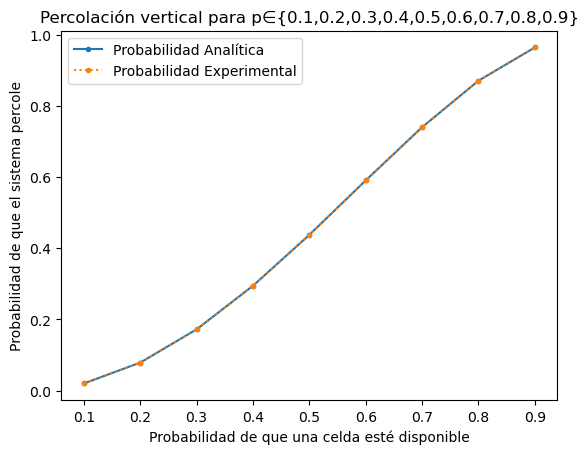

In [28]:
ErrorP=(e1+e2+e3+e4+e5+e6+e7+e8+e9)## Se suman todos los errores para realizar el calculo del promedio
print((ErrorP/9))
## pA siendo la probabilidad Analitica y pE la probabilidad calculada por simulación
import matplotlib.pyplot as plt
pA=[PAnalitica1,PAnalitica2,PAnalitica3,PAnalitica4,PAnalitica5,PAnalitica6,PAnalitica7,PAnalitica8,PAnalitica9]
pE=[PExperim1,PExperim2,PExperim3,PExperim4,PExperim5,PExperim6,PExperim7,PExperim8,PExperim9]
p=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.plot(p,pA,'.',linestyle='solid',label='Probabilidad Analítica')
plt.plot(p,pE,'.',linestyle='dotted',label='Probabilidad Experimental')

plt.title("Percolación vertical para p∈{0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9}") 
plt.xlabel("Probabilidad de que una celda esté disponible")
plt.ylabel("Probabilidad de que el sistema percole")
plt.legend()

plt.show()

---
## Conclusiones
Después de realizar las simulaciones para obtener un resultado experimental y calcular la probabilidad de manera analítica, se determina que la fórmula para la solución analítica del problema es correcta para una matriz de percolación de 2x2. El error promedio entre la Probabilidad analítica y la Probabilidad Experimental es mínima, con un promedio entre todas las simulaciónes realizadas de 0.00020734066638755574 y este error sigue disminuyendo mientras más ejecuciones se realicen. Con ello se concluye que la fórmula 𝑝^2*(2−𝑝^2) es correcta

---
## Bibliografía
https://introcs.cs.princeton.edu/python/24percolation/</br>
https://definicion.de/percolacion/